### Exercise 2:   Sampling from Discrete & Continuous Distributions

In [26]:
# imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, kstest
from math import log, floor
from collections import Counter
import random 

Functions for testing:

In [32]:
# Code for performing distribution tests

def make_histograms(gen_dist, expected_dist):
    width = 0.8

    indices = np.arange(len(gen_dist))

    plt.bar(indices, expected_dist, width=width, 
            color='b', label='Given Distribution')
    plt.bar([i+0.25*width for i in indices], gen_dist, 
            width=0.5*width, color='r', alpha=0.5, label='Generated Distribution')

    plt.legend()

    plt.show()

def test(X, pdf):
    
    pdf_gen = [float(i/sum(X)) for i in X] # sum(X) = total number of observations
    
    print("----- Probability Distributions -----")
    print(f"Generated pdf: {pdf_gen}")
    print(f"Expected pdf: {pdf}\n")
    
    chisq, p = chisquare(X, f_exp=[i*sum(X) for i in pdf])
    
    print(r"----- Performing chi-squared test (alpha = 5%) -----")
    print(f"Test statistic: {chisq}")
    print(f"P-value: {p}\n")

    print(r"----- Performing Kolmogorov-Smirnov test (alpha = 5%) -----")

    cdf = np.cumsum(pdf)
    res = kstest(X, cdf)
    print(f"Test statistic: {res.statistic}")
    print(f"P-value: {res.pvalue}\n")
    

    print("----- Visual Comparison between PDFs -----")
    make_histograms(pdf_gen, pdf)


**1. Choose a value for the probability parameter p in the geometric distribution and simulate 10,000 outcomes. You can experiment with a small, moderate and large value if you like.**

In [22]:
def geometric_dist(U, p):
    return [floor(log(i)/log(1-p))+1 for i in U]

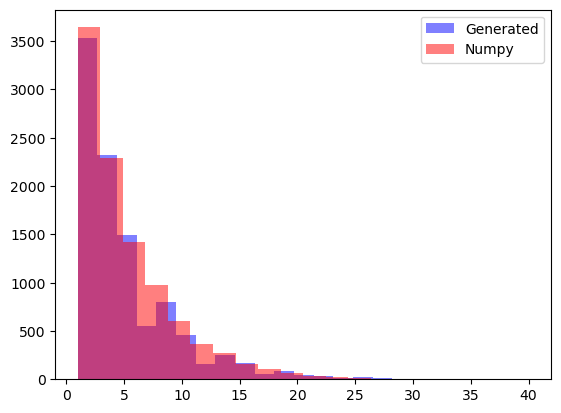

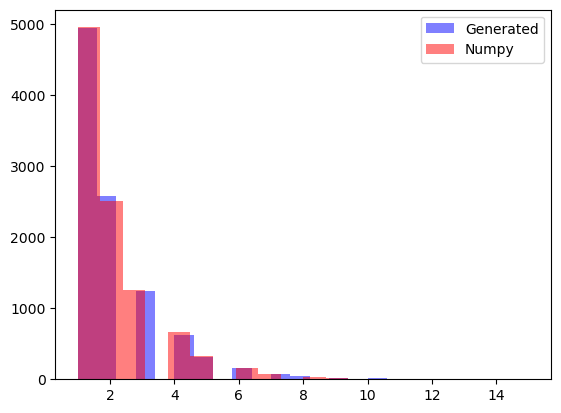

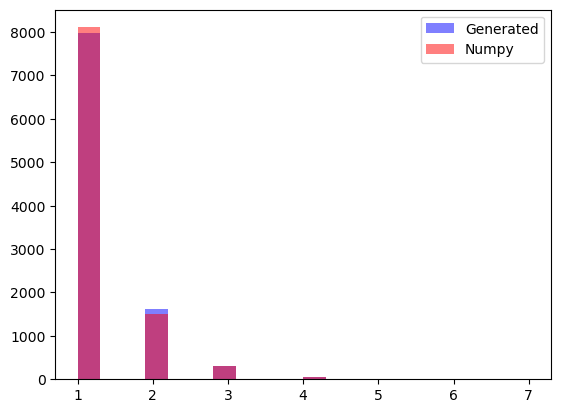

In [24]:
ps = [0.2, 0.5, 0.8]


for p in ps:
    
    U = np.random.uniform(size=10000)
    
    g_d, g_d_ref = geometric_dist(U, p), np.random.geometric(p=p, size = 10000)
    
    plt.hist(g_d, bins=20, color="b", label="Generated",alpha=0.5)
    plt.hist(g_d_ref, bins=20, color="r", label="Numpy",alpha=0.5)

    plt.legend()

    plt.show()
    
    



**2. Simulate the 6 point distribution**

| $X$  |  1 | 2  | 3  | 4  |5   | 6  |
|---|---|---|---|---|---|---|
| $p_i$  | 7/48  | 5/48  | 1/8  | 1/16  | 1/4  | 5/16  |

In [27]:

# 6-point distribution

dist_6pt = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]

**(a) by applying a direct (crude) method**

In [28]:
# Helper function for crude method of discrete random sampling

def insert_into_categories(values, intervals):
    
    new_dist = [0 for i in range(len(intervals))]

    for value in values:
        for i, interval in enumerate(intervals): # Linear search    
            if interval[0] < value and value <= interval[1]:
    
                new_dist[i] += 1
    
    return new_dist

def crude_method(pdf, size):    
    
    U = np.random.uniform(size=size)
    cdf = np.cumsum(pdf)
    intervals = [(0, cdf[0])]+[(cdf[i-1], cdf[i]) for i in range(1, len(cdf))]
    
    return insert_into_categories(U, intervals)

Generating sample and testing

----- Direct/Crude Method -----

----- Probability Distributions -----
Generated pdf: [0.1446, 0.1023, 0.1246, 0.0611, 0.255, 0.3124]
Expected pdf: [0.14583333333333334, 0.10416666666666667, 0.125, 0.0625, 0.25, 0.3125]

----- Performing chi-squared test (alpha = 5%) -----
Test statistic: 1.7655314285714339
P-value: 0.8805426808326408

----- Performing Kolmogorov-Smirnov test (alpha = 5%) -----
Test statistic: 1.0
P-value: 0.0021645021645021645

----- Visual Comparison between PDFs -----


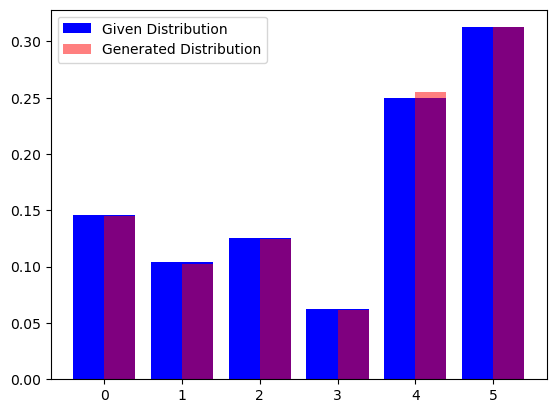

In [33]:
print("----- Direct/Crude Method -----\n")

crude_sample = crude_method(dist_6pt, 10000)
test(crude_sample, dist_6pt)

Comments:

**(b) by using the the rejction method**

In [36]:
# Helper function to make list of counts of each value - for testing

def make_freq_dist(X, keys=[1,2,3,4,5,6]):
    
    freq = []

    for i in keys:
    
        X.count(i)
        freq.append(X.count(i))

    return freq

def accept_reject_method(pdf, size, k, c=1):
    
    X = [0 for i in range(len(pdf))]
    
    while sum(X) < size:
    
        U1, U2 = np.random.uniform(), np.random.uniform()
        I = floor(k*U1)+1
        p_I = pdf[int(I)-1]
        if U2 <= p_I/c: X.append(I)
    
    
    return X

----- Accept/Reject Method -----
----- Probability Distributions -----
Generated pdf: [0.13966017405719022, 0.10236220472440945, 0.12101118939079983, 0.06547865727310402, 0.25196850393700787, 0.3195192706174886]
Expected pdf: [0.14583333333333334, 0.10416666666666667, 0.125, 0.0625, 0.25, 0.3125]

----- Performing chi-squared test (alpha = 5%) -----
Test statistic: 1.773500680835952
P-value: 0.8795129061605854

----- Performing Kolmogorov-Smirnov test (alpha = 5%) -----
Test statistic: 1.0
P-value: 0.0021645021645021645

----- Visual Comparison between PDFs -----


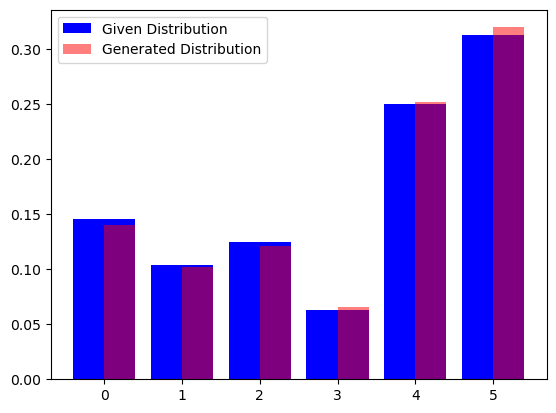

In [39]:
ar_sample = accept_reject_method(dist_6pt, 10000, len(dist_6pt))
print("----- Accept/Reject Method -----")
test(make_freq_dist(ar_sample), dist_6pt)

Comments:

**(c) by using the Alias method**

In [40]:
def gen_tables(pdf, k=6):
    L = [i for i in range(1, k+1)]
    F = [k*i for i in pdf]
    G = [i for i in range(len(F)) if F[i] >= 1]
    S = [i for i in range(len(F)) if i <= 1]
    while len(S) != 0:
        i = G[0]
        j = S[0]
        L[j] = i
        F[i] = F[i] - (1 - F[j])
        if F[i] < 1:
            G = G[1:]
            S.append(i)
        S = S[1:]
    
    return F, L

def alias_method(pdf, size, k=6):
    F, L = gen_tables(pdf)
    X = []
    while len(X) < size:
    
        U1, U2 = np.random.random(), np.random.random()
        I = np.floor(k*U1)+1

        if U2 <= F[int(I)-1]: X.append(I)
        else: X.append(L[int(I)-1])
    
    return X

----- Alias Method -----
----- Probability Distributions -----
Generated pdf: [0.1398, 0.1029, 0.1657, 0.2511, 0.1706, 0.1699]
Expected pdf: [0.14583333333333334, 0.10416666666666667, 0.125, 0.0625, 0.25, 0.3125]

----- Performing chi-squared test (alpha = 5%) -----
Test statistic: 6729.249622857142
P-value: 0.0

----- Performing Kolmogorov-Smirnov test (alpha = 5%) -----
Test statistic: 1.0
P-value: 0.0021645021645021645

----- Visual Comparison between PDFs -----


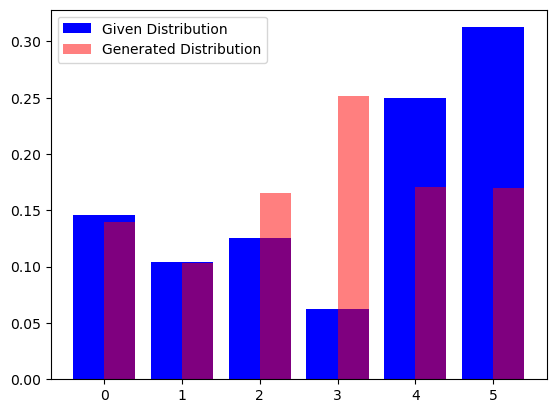

In [44]:
alias_sample = alias_method(dist_6pt, 10000)

print("----- Alias Method -----")
test(make_freq_dist(alias_sample), dist_6pt)